In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
datos=sns.load_dataset('penguins')


In [87]:
#borrar nulos
datos.dropna(inplace=True)

In [88]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [89]:
datos['sex'].value_counts()

,count
sex,
Male,168
Female,165


In [90]:
cambiarSexo=({'Male':0,'Female':1})
datos['sex']=datos['sex'].map(cambiarSexo)

In [91]:
datos['sex'].value_counts()

,count
sex,
0,168
1,165


In [92]:
datos['island'].value_counts()

,count
island,
Biscoe,163
Dream,123
Torgersen,47


In [93]:
cambiarIsla=({'Biscoe':0,'Dream':1,'Torgersen':2})
datos['island']=datos['island'].map(cambiarIsla)

In [94]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,0
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0,1
340,Gentoo,0,46.8,14.3,215.0,4850.0,1
341,Gentoo,0,50.4,15.7,222.0,5750.0,0
342,Gentoo,0,45.2,14.8,212.0,5200.0,1


In [95]:
datosx=datos.drop('species',axis=1)

In [96]:
datos.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.651652,43.992793,17.164865,200.966967,4207.057057,0.495495
std,0.714715,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,44.500000,17.300000,197.000000,4050.000000,0.000000
75%,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


In [97]:
datosx.corr()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,1.000000,-0.337179,0.568031,-0.554413,-0.559526,0.012435
bill_length_mm,-0.337179,1.000000,-0.228626,0.653096,0.589451,-0.344078
bill_depth_mm,0.568031,-0.228626,1.000000,-0.577792,-0.472016,-0.372673
flipper_length_mm,-0.554413,0.653096,-0.577792,1.000000,0.872979,-0.255169
body_mass_g,-0.559526,0.589451,-0.472016,0.872979,1.000000,-0.424987
sex,0.012435,-0.344078,-0.372673,-0.255169,-0.424987,1.000000


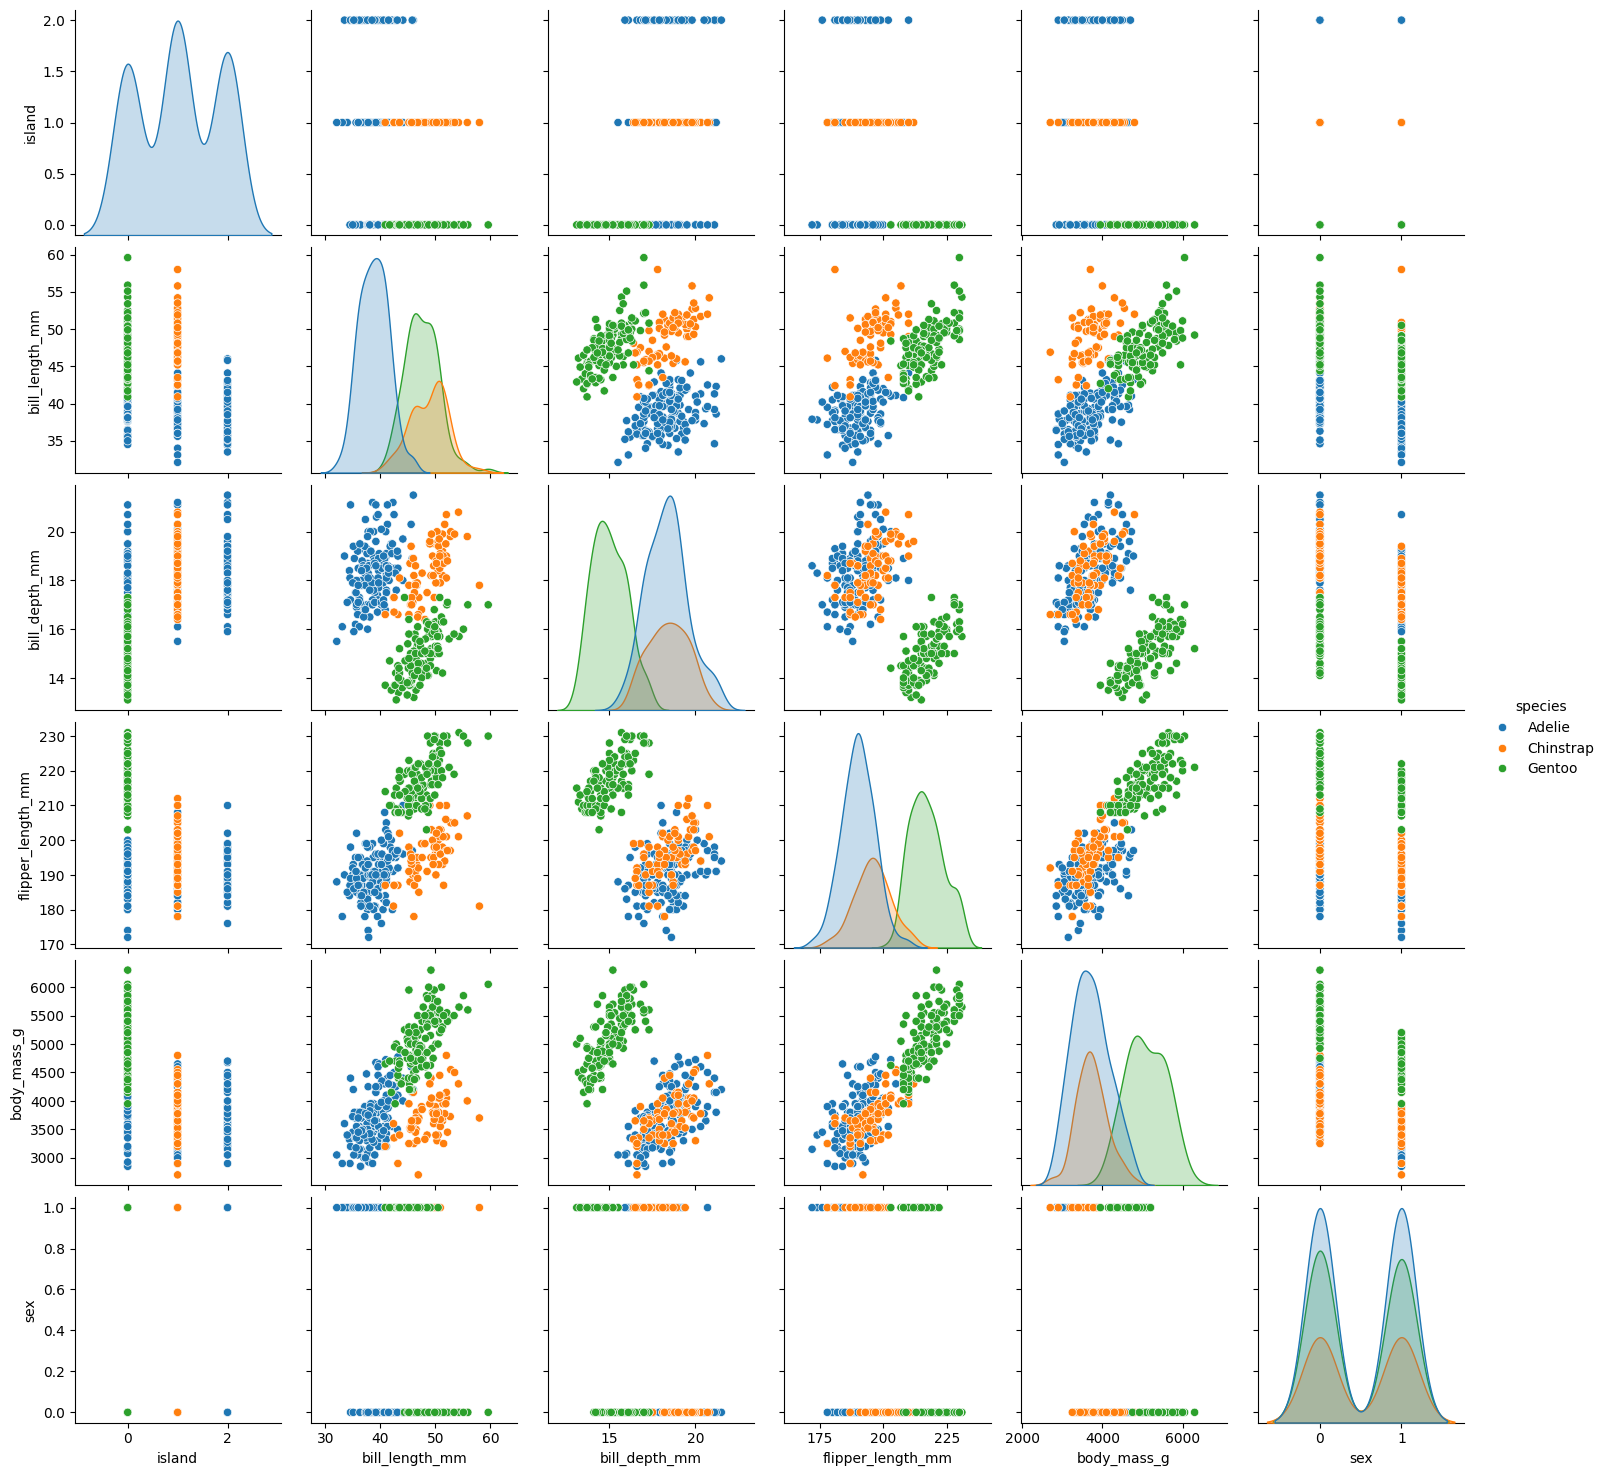

In [47]:
sns.pairplot(datos,hue='species')

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(datosx,datos['species'],test_size=0.3)

In [100]:
from sklearn.neural_network import MLPClassifier

In [115]:
#una Perceptrón Multicapa con entradas, 2 capas ocultas de 10 neuronas cada una
mlp=MLPClassifier(hidden_layer_sizes=(10,10),random_state=42)

In [116]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42)

In [117]:
ypredTest=mlp.predict(x_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [119]:
mx=confusion_matrix(y_test,ypredTest)
mx

array([[44,  1,  0],
       [ 4,  6, 10],
       [ 0,  0, 35]])

In [120]:
print(classification_report(y_test,ypredTest))

              precision    recall  f1-score   support

      Adelie       0.92      0.98      0.95        45
   Chinstrap       0.86      0.30      0.44        20
      Gentoo       0.78      1.00      0.88        35

    accuracy                           0.85       100
   macro avg       0.85      0.76      0.76       100
weighted avg       0.86      0.85      0.82       100



In [121]:
accuracy_score(y_test,ypredTest)

0.85

In [122]:
XdataMilimetros=datos[["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm"]]
XdataMilimetros

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
338,47.2,13.7,214.0
340,46.8,14.3,215.0
341,50.4,15.7,222.0
342,45.2,14.8,212.0


In [123]:
x_train,x_test,y_train,y_test=train_test_split(XdataMilimetros,datos['species'],test_size=0.3)

In [124]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42)

In [125]:
ypredTest=mlp.predict(x_test)

In [126]:
accuracy_score(y_test,ypredTest)

0.83

In [127]:
mx=confusion_matrix(y_test,ypredTest)
mx

array([[43,  1,  0],
       [ 3,  4, 13],
       [ 0,  0, 36]])

In [128]:
datos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,0
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,0,47.2,13.7,214.0,4925.0,1
340,Gentoo,0,46.8,14.3,215.0,4850.0,1
341,Gentoo,0,50.4,15.7,222.0,5750.0,0
342,Gentoo,0,45.2,14.8,212.0,5200.0,1


In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

In [153]:
#array o vector, datos con media cero y desviación estándar 1
datosEscados=scaler.fit_transform(datosx)

In [154]:
datosEscados.shape

(333, 6)

In [155]:
datosEscados=pd.DataFrame(datosEscados,columns=datosx.columns)

In [140]:
datosEscados

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.889392,-0.896042,0.780732,-1.426752,-0.568475,-0.991031
1,1.889392,-0.822788,0.119584,-1.069474,-0.506286,1.009050
2,1.889392,-0.676280,0.424729,-0.426373,-1.190361,1.009050
3,1.889392,-1.335566,1.085877,-0.569284,-0.941606,1.009050
4,1.889392,-0.859415,1.747026,-0.783651,-0.692852,-0.991031
...,...,...,...,...,...,...
328,-0.913136,0.587352,-1.762145,0.931283,0.892957,1.009050
329,-0.913136,0.514098,-1.457000,1.002739,0.799674,1.009050
330,-0.913136,1.173384,-0.744994,1.502928,1.919069,-0.991031
331,-0.913136,0.221082,-1.202712,0.788372,1.234995,1.009050


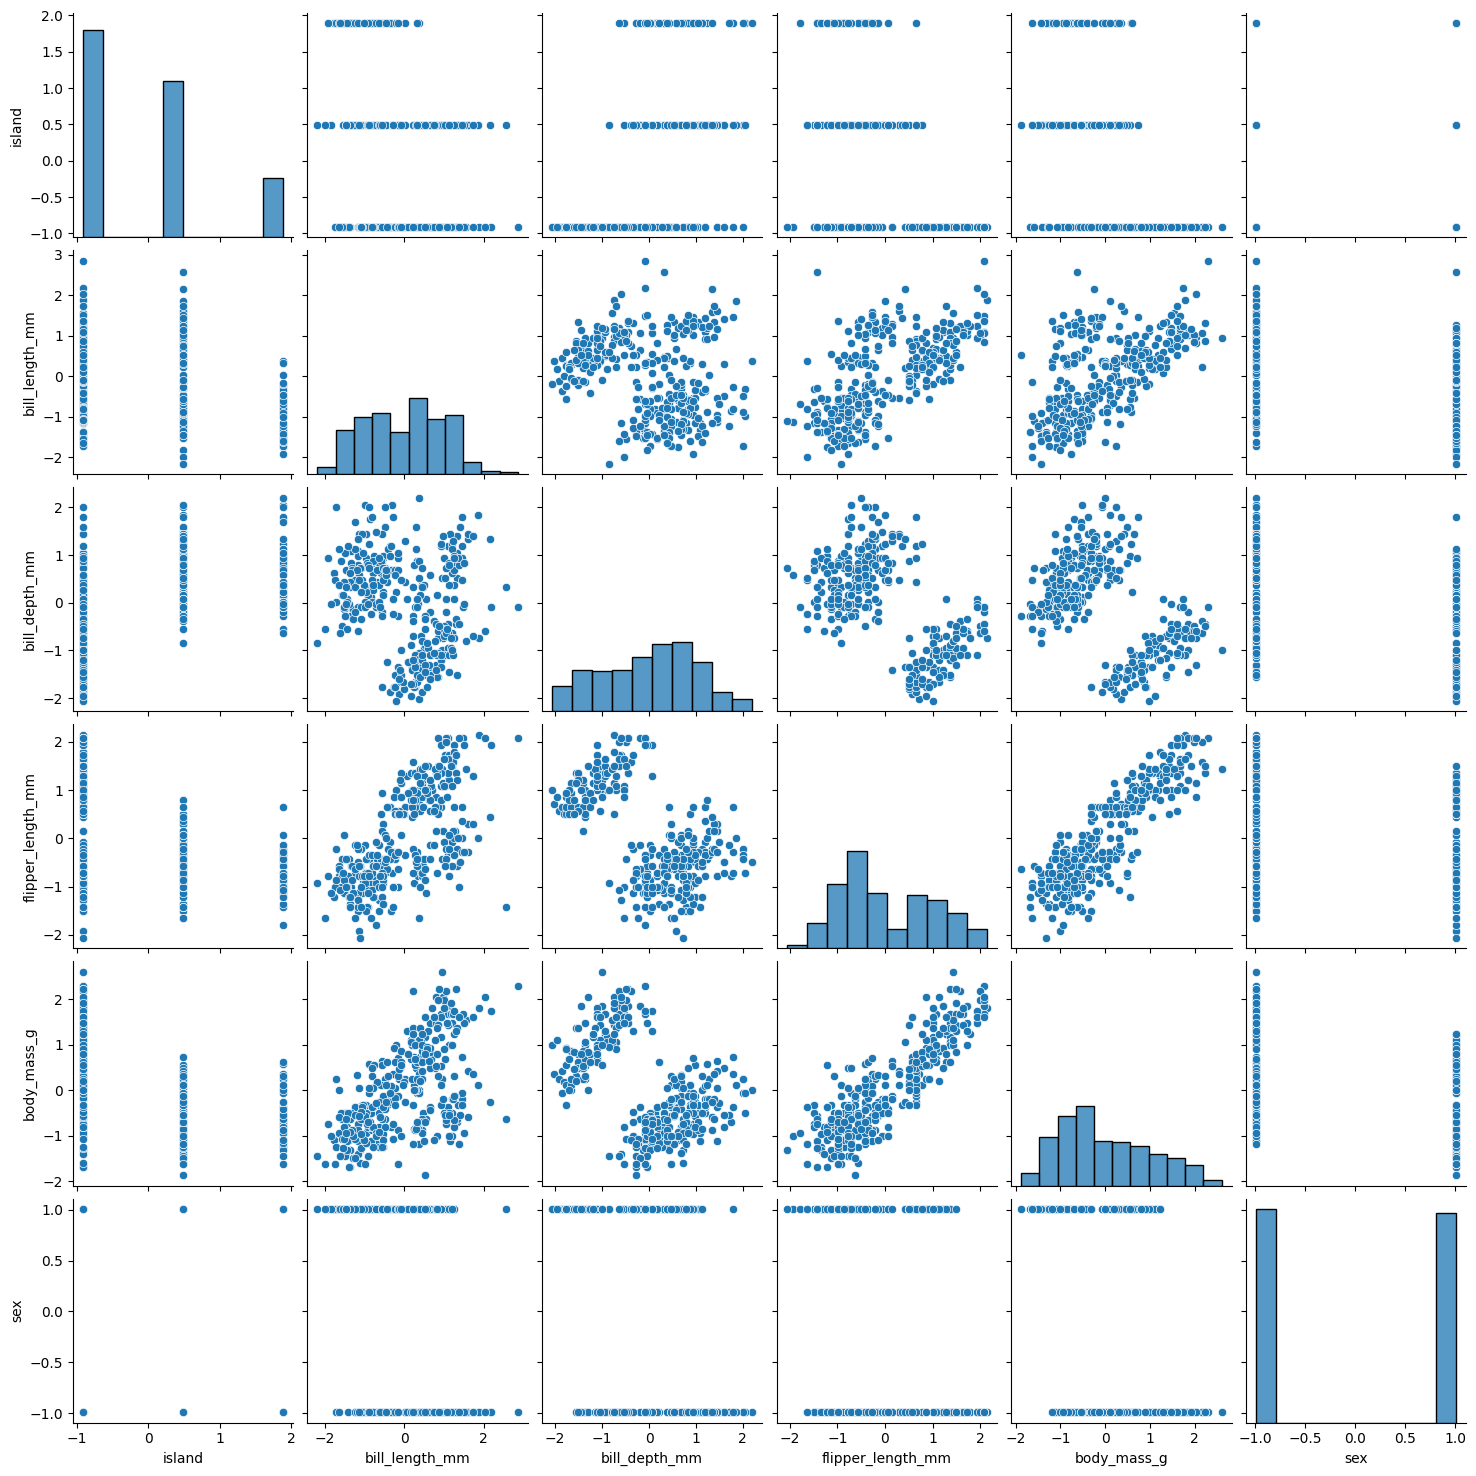

In [141]:
sns.pairplot(datosEscados)

In [156]:
x_train,x_test,y_train,y_test=train_test_split(datosEscados,datos['species'],test_size=0.3)

In [201]:
#mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),random_state=42)
#mlp=MLPClassifier(hidden_layer_sizes=(10,20,10),activation="relu",random_state=42)
#mlp=MLPClassifier(hidden_layer_sizes=(10,20),activation="relu",solver="sgd",random_state=42)
#mlp=MLPClassifier(hidden_layer_sizes=(10,20),activation="relu",solver="lbfgs",random_state=42)
mlp=MLPClassifier(hidden_layer_sizes=(10,10),activation="relu",solver="lbfgs",random_state=42)


In [202]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), random_state=42, solver='lbfgs')

In [203]:
ypredTestEsc=mlp.predict(x_test)

In [204]:
mx=confusion_matrix(y_test,ypredTestEsc)
mx

array([[51,  0,  0],
       [ 2, 19,  0],
       [ 0,  0, 28]])

In [205]:
accuracy_score(y_test,ypredTestEsc)

0.98

In [200]:
print(classification_report(y_test,ypredTestEsc))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        51
   Chinstrap       1.00      0.95      0.98        21
      Gentoo       1.00      1.00      1.00        28

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

